In [15]:
import os, yaml, sys
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import clear_output
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from image_processing.utils import read_video
from image_processing.computational_models import detect_faces, make_corners


In [3]:
from huggingface_hub import hf_hub_download
face_model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")
face_model = YOLO(face_model_path)
person_model_path = 'yolov8n.pt'
person_model = YOLO(person_model_path)

In [4]:
video_dir = f"{paths['livingstone_lab']}/Stimuli/Movies/all_videos"
video_fn = os.listdir(video_dir)

In [5]:
people_vids = [fn for fn in video_fn if ("IMG" not in fn) and ("YDX" not in fn)]

In [6]:
monkey_vids = [fn for fn in video_fn if "IMG" in fn]

In [7]:
ydx_vids = [fn for fn in video_fn if "YDX" in fn]

In [17]:
monkey_vids

['IMG_4664.mp4',
 'IMG_4665.mp4',
 'IMG_4695.mp4',
 'IMG_4666.mp4',
 'IMG_4700.mp4',
 'IMG_4656.mp4',
 'IMG_4670.mp4',
 'IMG_4671.mp4',
 'IMG_4692.mp4',
 'IMG_4657.mp4',
 'IMG_4723.mp4',
 'IMG_4710.mp4',
 'IMG_4729.mp4',
 'IMG_4658.mp4',
 'IMG_4660.mp4',
 'IMG_4712.mp4',
 'IMG_4706.mp4',
 'IMG_4669.mp4',
 'IMG_4672.mp4',
 'IMG_4697.mp4',
 'IMG_4713.mp4',
 'IMG_4721.mp4',
 'IMG_4709.mp4',
 'IMG_4722repl.mp4',
 'IMG_4704.mp4',
 'IMG_4659.mp4',
 'IMG_4655.mp4',
 'IMG_4693.mp4',
 'IMG_4727.mp4',
 'IMG_4699.mp4',
 'IMG_4703.mp4',
 'IMG_4722_repl2.mp4',
 'IMG_4662.mp4',
 'IMG_4696.mp4',
 'IMG_4668.mp4',
 'IMG_4711.mp4',
 'IMG_4694.mp4',
 'IMG_4722.mp4',
 'IMG_4724.mp4',
 'IMG_4673.mp4',
 'IMG_4728.mp4',
 'IMG_4702.mp4',
 'IMG_4663.mp4',
 'IMG_4707.mp4',
 'IMG_4730.mp4',
 'IMG_4705.mp4',
 'IMG_4698.mp4',
 'IMG_4708.mp4',
 'IMG_4661.mp4',
 'IMG_4667.mp4',
 'IMG_4701.mp4']

In [11]:

v = read_video(paths, 1, people_vids[0], vid_duration=0)


15:44:50 - rank 1 steve1toBluehat_rev.mp4 read successfully


In [12]:
coords = detect_faces(v, face_model, person_model, 1.5)

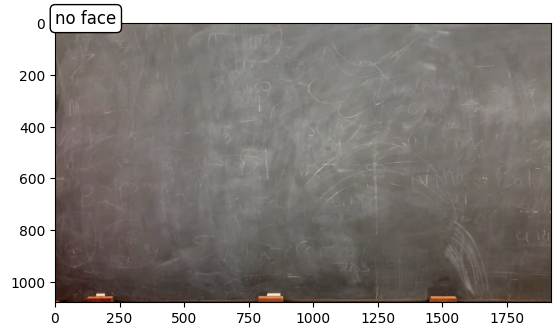

In [16]:
# print and check
for i in range(v.shape[0]):
    plt.imshow(v[i, :, :, :])
    if coords[1, i] is not None:
        points = make_corners(*coords[2:, i])
        plt.plot(points[:, 0], points[:, 1], 'r-', linewidth=2)
    if coords[0, i] == 0:
        label = "no face"
    elif coords[0, i] == 1:
        label = f"face {coords[1, i]}"
    elif coords[0, i] == 2:
        label = f"occluded {coords[1, i]}"
    plt.text(1, 0.8, label, fontsize=12,
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
    plt.show()
    clear_output(wait=True)